# Supervised Learning Capstone Project - Cohort Analysis & Customer Churn Predictions (using Tree Methods)



### GOAL: This project is to create a model to predict whether or not a customer will Churn .

+ [Data](#data)
+ [Part 1: Data Quick Check](#quick)
+ [Separate numerics and Categorical column](#data)
    + [Data](#seperate)
+ [Part 2:  Exploratory Data Analysis](#eda)
    + [General Feature Exploration](#generaleda)
        + [Data Balance check for `Churn` label class](#balacecheck)
    + [Distribution of TotalCharges by Churn Categories](#dis_totalcharges)
    + [Distribution of TotalCharges by Contract Type](#dis_totalcharges_contract)
+ [Correlation between features and Churn label](#correlation)
+ [Part 3: Churn Analysis](#churnanalysis)
    + [Distribution of `tenure` column](#tenuredist)
    + [Total Charges vs Monthly Charges](#tcmontly)
    + [Cohorts based on Tenures](#cohorts)
        + [Visualization of Churn Rate per tenure group 1-72 months](#cohorts_vis)
    + [Broder Cohort Groups](#brodercohort)
    + [Visualization of Total Charges vs Monthly Charts](#vis_toal_monthly)
    + [Churn Count per Cohort Group](#churn_count_cohort)
    + [Visualization of Tenure Cohort, separated out by contract type and Churn](#vis_tenure_contract_churn)
+ [Part 4: Predictive Modeling](#modelling)
    + [Single Decision Tree](#decisiontree)
    + [Random Forest](#randomforest)
    + [Boosted Trees with Ada Boost and Gradient Boost](#boosted)
+ [Final Model Selection and Evaluation](#final_model)

# <a name='data'>Data</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


-----


# <a name='quick'>Part 1: Data Quick Check</a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


## <a name='seperate'>Separate numerics and Categorical columns</a>
+ for categroical columns, we will need to convert them to dummy variables.

In [6]:
numerics_columns = df.select_dtypes(exclude='object')
categorical_columns = df.select_dtypes(include='object')

In [7]:
numerics_columns.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [8]:
categorical_columns.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

We need to take note of `SeniorCitizen` column as Categorical as 0 or 1 doesn't make sense to be continous values.

In [9]:
numerics_columns.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50


In [10]:
categorical_columns.head(2)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


#### Add `SeniorCitizen` column to Categorical Columns list.

In [11]:
categorical_columns = pd.concat([categorical_columns, numerics_columns['SeniorCitizen']], axis=1)

#### Drop `CustomerID` column

In [12]:
categorical_columns = categorical_columns.drop(['customerID'], axis=1)

In [13]:
categorical_columns.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [14]:
# drop from numerical columns
numerics_columns = numerics_columns.drop('SeniorCitizen', axis=1)
numerics_columns.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


In [15]:
numerics_columns.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [16]:
categorical_columns.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

-----

# <a name='eda'>Part 2:  Exploratory Data Analysis</a>
## <a name='generaleda'>General Feature Exploration</a>

In [17]:
# check missing data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###  <a name='balacecheck'>Data Balance check for `Churn` label class</a>

In [18]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [19]:
5163 / len(df), 1869/len(df)

(0.7342150170648464, 0.26578498293515357)

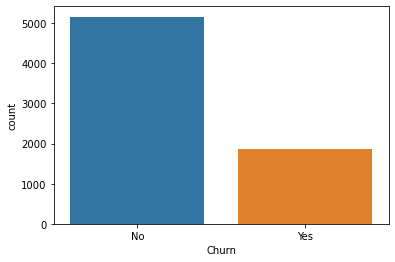

In [20]:
sns.countplot(data=df, x='Churn');

It seems like our dataset is not that really balanced.  (73% for No Churn , 27% for Churn)

We need to take note of it.

-----

 ##  <a name='dis_totalcharges'>Distribution of TotalCharges by Churn Categories</a>

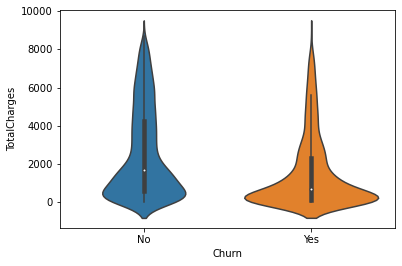

In [21]:
sns.violinplot(data=df, x='Churn', y='TotalCharges');

We can see that people in Churn = Yes category has lower median `TotalCharges`. This makes sense as new customers are more likely to churn leading to lower median Total Charges, than customers who are with the service for some time.

------

 ##  <a name='dis_totalcharges_contract'>Distribution of TotalCharges by Contract Type</a>

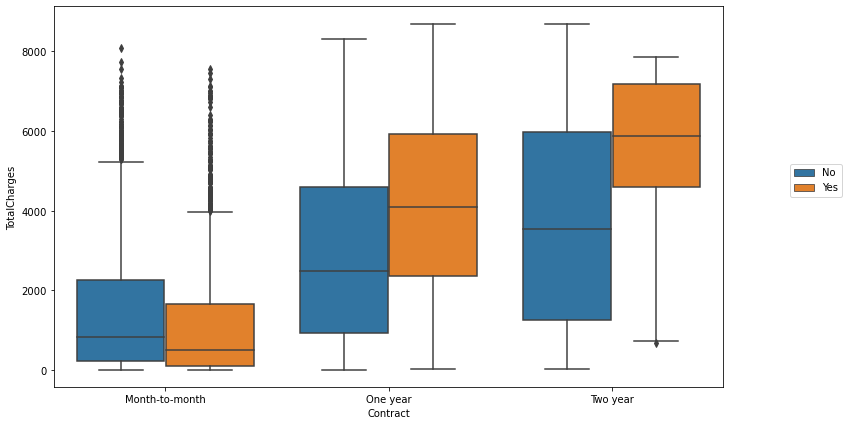

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn');
plt.legend(loc=(1.1,0.5));

Based on the above box plot, we can see that
+ For `Month-to-month` contract type has the Lowest Total Charges which makes sense. However there are so many outliers  with high Total Charages, beyond the median value of other contract types. Meaning there are certain number of people who prefer to use `Month-to-Month` contract type and incure very high TotalCharges.
+ Customer Churn is higher for `One Year Contract` and `Two Year` contract. People with Higher Total Charges are more like to churn and swtich to another service after the end of the contract term. 
+ Moreover, People with Higher Total Charges churns than people with Low Total Charges (in both `One Year` and `Two Year` contract types). This is very significant in`Two Year`. 

For those points, we need to dig deeper to understand what is actually happening behind.

Maybe we can also introduce `Rebate` or `Bonus Cupons` after 1 year contract, 2 year contract, etc to bring down those charges and make sure customers doesn't churn.

It is more benefit for the business to keep the customers for longer terms rather than squeezing more money from them.

------

 # <a name='correlation'>Correlation between features and Churn label</a>

**NOTE: For the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.**

In [23]:
categorical_columns.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

In [24]:
corr_df = pd.get_dummies(df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']]).corr()

In [25]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values()[1: -1]
corr_yes_churn

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

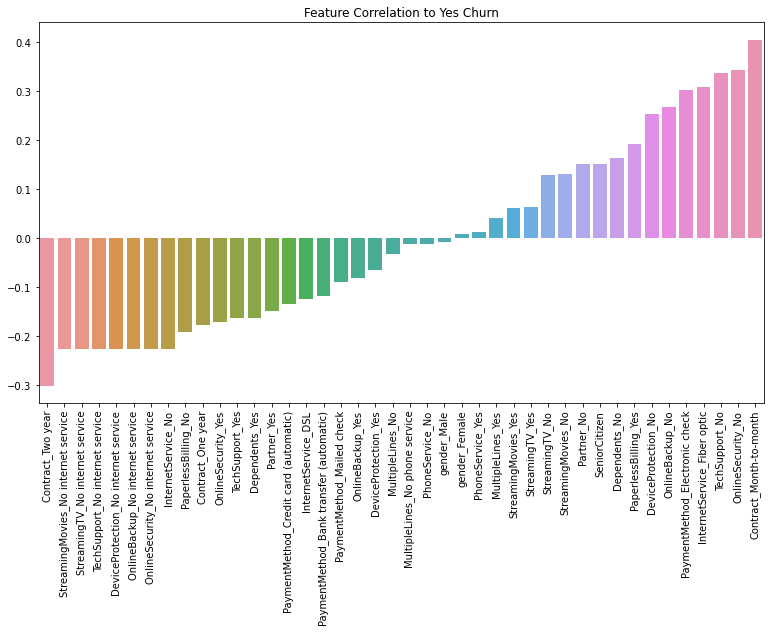

In [26]:
plt.figure(figsize=(13, 7))
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values);
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90);

+ `Contract_Month-to-month` is the highest correlated with Churn and it makes sense because it is very likely for customer to churn if they are on Monthly Contract basis. 
+ On the other hand, `Contract_Two_year` has the highest negative correlation with Churn as customer mighted tied to long term contract and it is unlikely that they can churn during the contract period.

----

 # <a name='churnanalysis'>Part 3: Churn Analysis</a>

**We will focus on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**


## What are the 3 contract types available?

In [27]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

----

## <a name='tenuredist'>Distribution of `tenure` column</a>
`tenure`:  the amount of months a customer was or has been on a customer.

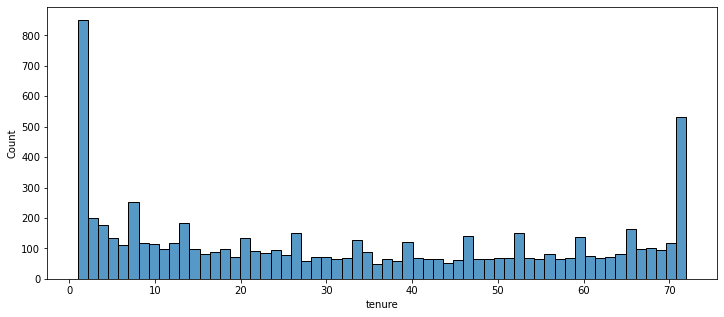

In [28]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='tenure', bins=60);

+ We can see that there are very high number of customers on very short tenure (like 1, 2.. etc). These may be the customers on Month To Month contract type and likely to churn after short period of time. 

+ Very intersting point is on the other side of the chart, we can see customers with very long tenure (70+). Those are the customers who stay with services for the longest period of time and long term customers. Maybe they are the people who are loyal to the servies or customers who are really needed to use the services.



-------

<Figure size 2400x1000 with 0 Axes>

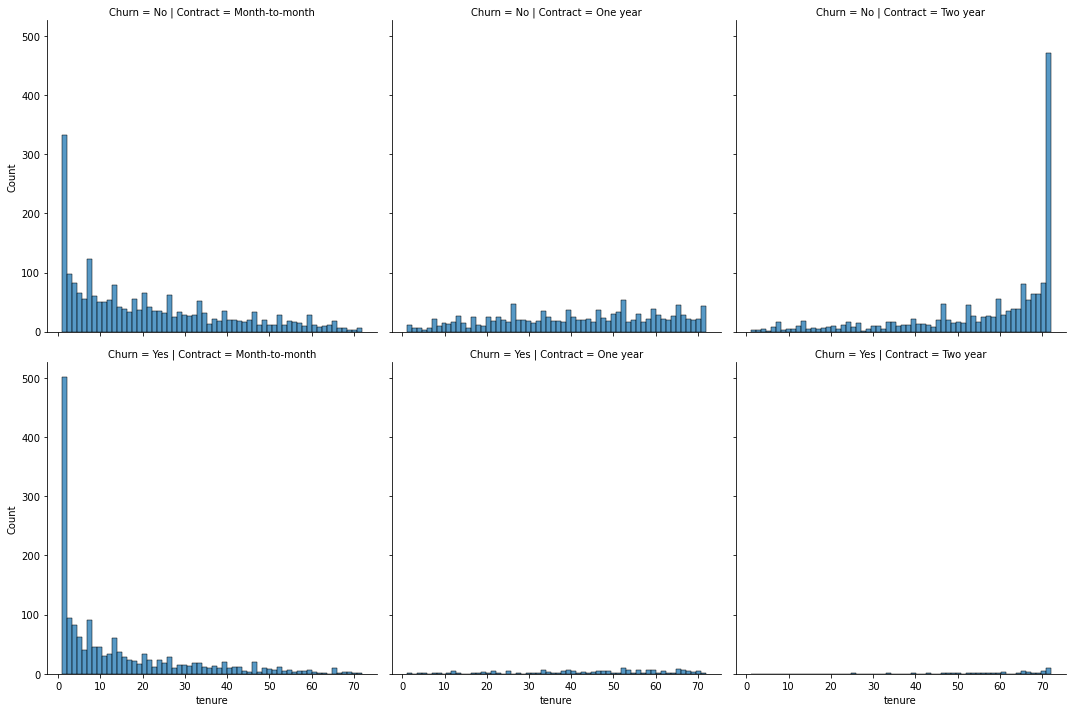

In [29]:
plt.figure(figsize=(12, 5), dpi=200)
sns.displot(data=df, x='tenure', col='Contract', row='Churn', bins=60);

#### Month-to-Month
+ We can see that Customers on `Month-to-Month` contract are more likely to churn. At the same time we have smilar trend for customers who are on Month-to-Month without Churning. However compared to other Contract type, customers with long tenure(50 months +) are lower on `Month-to-Month`.
+ There is an even split between Churn and No Churn for `Month-to-Month`. Maybe as a company, our focus should be **"How do we actually make people on Month to Month to stay longer and not churn?"**.
+ Another intesting point is there are also many customers who are on very long tenures like (10 months, 20 months, etc) and still on Month-to-Month. **Why are they still on Month-to-Month and never converting to Yearly contract if they are using services for so long?**
+ We also found out previously that Customers with Higher Total Charges are likely to churn. So we may want to provide promotions like **You are on this service for 12 months (month-to-month). If you convert to 1 year contract, you will enjoy ..... etc**

#### One Year , Two Year

+ For both `One Year` and `Two Year` contract type, we can see nearly flat trend for customers who churn. As mentioned earlier, this may be partly because customers are tied to the yearly contract and couldn't churn.
+ For `Two Year Contract`, we can clearly see there are long term customers (tenure with more than 70).
+ So we don't need to worry too much about `One Year` and `Two Year` contract types as they are very unlikely to churn, comparing to `Month-to-Month`.

--------------

## <a name='tcmontly'>Total Charges vs Monthly Charges</a>

In [32]:
numerics_columns.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

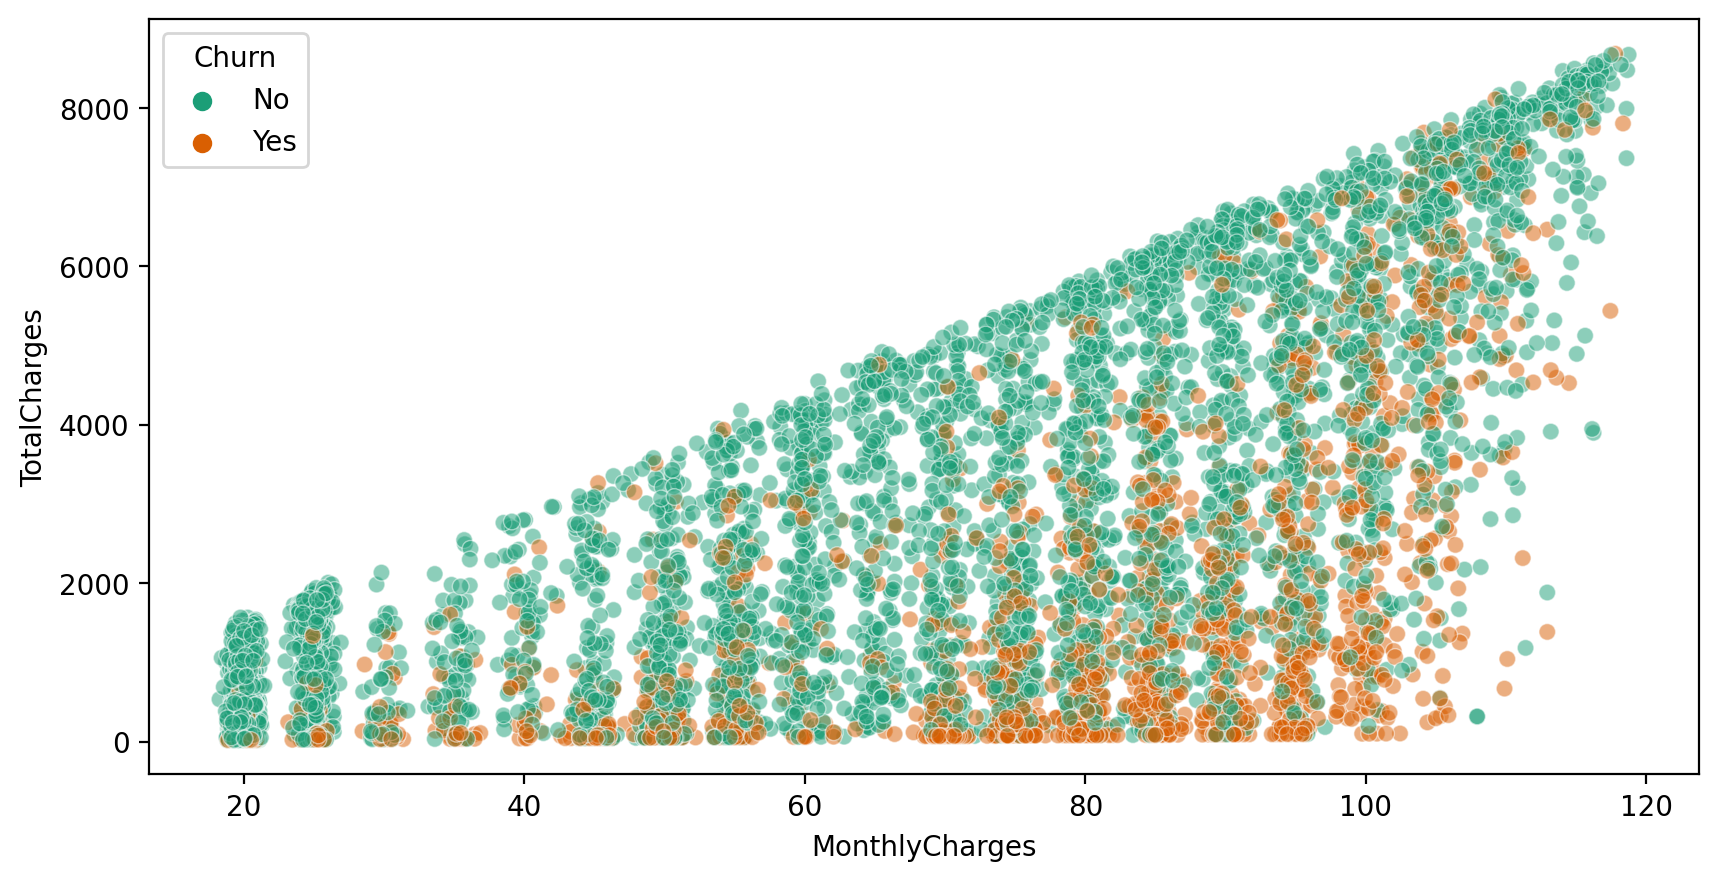

In [45]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Dark2', alpha=0.5, linewidth=0.5);

Overall, we can see customers with higher `Monthly Charges` with higher `TotalCharges` are more likely to churn.  We will need to dig deeper.

--------

## <a name='cohorts'>Cohorts based on Tenures</a>

**we will begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**


In [55]:
unique_tenures = sorted(df['tenure'].unique())
unique_tenures[:5], unique_tenures[-5:]

([1, 2, 3, 4, 5], [68, 69, 70, 71, 72])

### Churn rates per Tenure groups

#### Approach 1)

In [85]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [86]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [92]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

#### Approach 2)

In [73]:
total_churns_by_tenure = df[df['Churn'] == 'Yes'].groupby('tenure').count()['customerID']
total_churns_by_tenure.head()

tenure
1    380
2    123
3     94
4     83
5     64
Name: customerID, dtype: int64

In [70]:
total_customers_by_tenure = df.groupby('tenure').count()['customerID']
total_customers_by_tenure

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: customerID, Length: 72, dtype: int64

In [76]:
churn_rates_by_tenure = 100* total_churns_by_tenure / total_customers_by_tenure

In [77]:
churn_rates_by_tenure

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

### <a name='cohorts_vis'>Visualization of Churn Rate per tenure group 1-72 months</a>

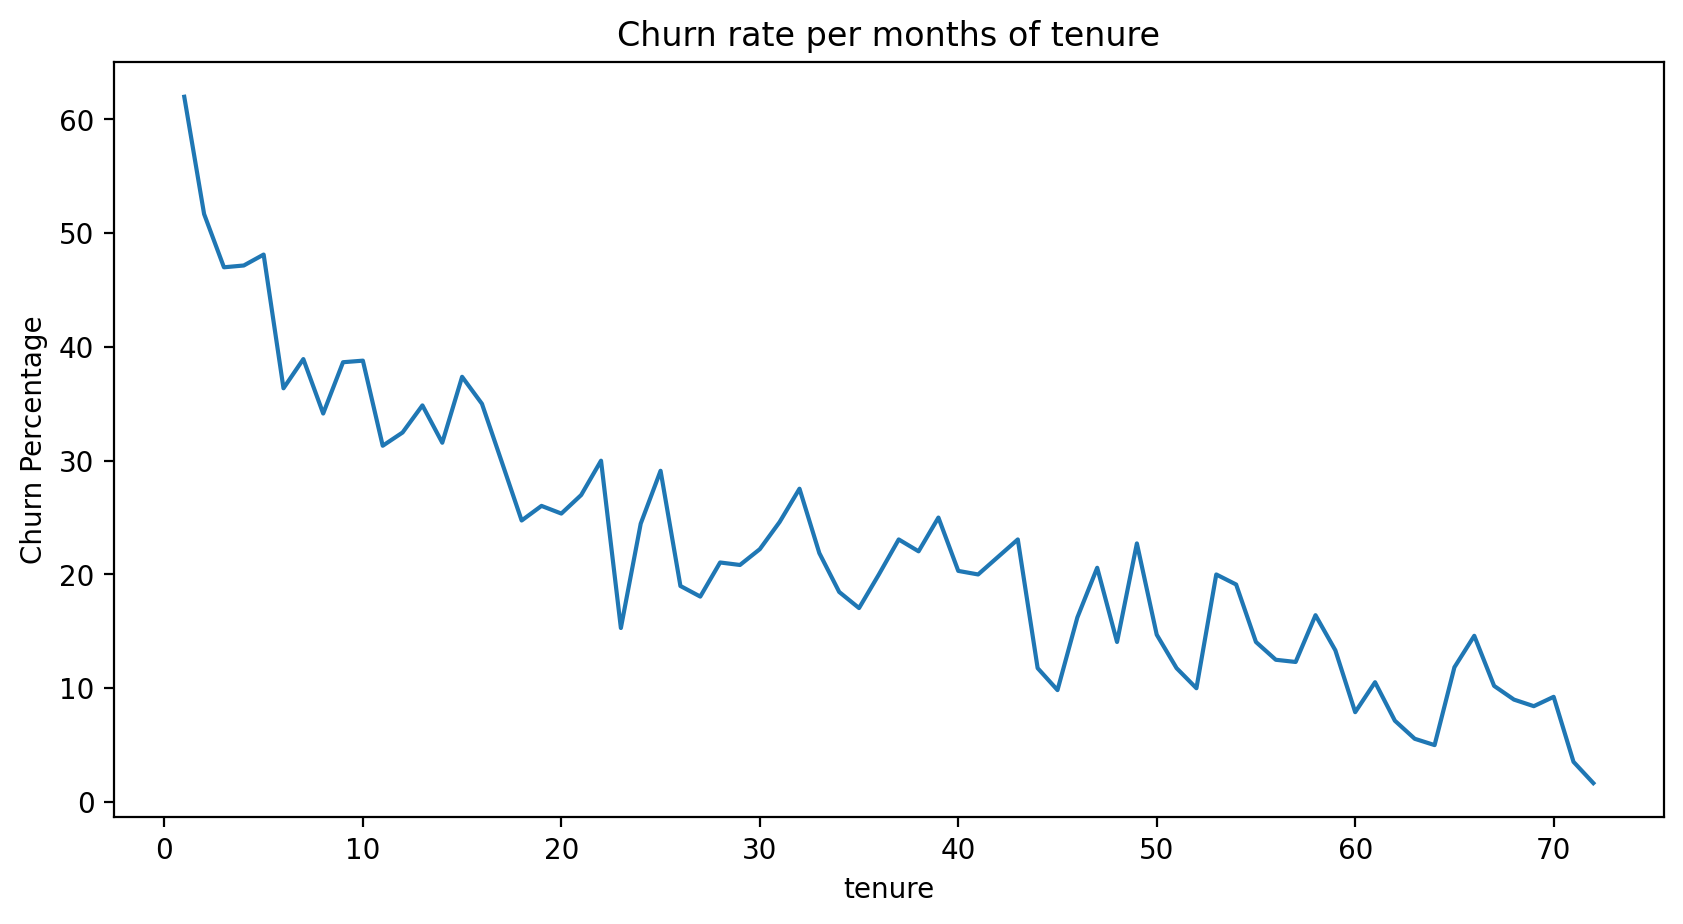

In [100]:
plt.figure(figsize=(10, 5), dpi=200)
churn_rates_by_tenure.plot();
plt.ylabel('Churn Percentage')
plt.title('Churn rate per months of tenure');

As `tenure` gets longer, customers tends to get stay longer with the service.

We can see a very high `Churn Percentage` for shot tenure period.

------

## <a name='brodercohort'>Broder Cohort Groups</a>

**Based on the tenure column values, will create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'   

In [105]:
def cohort_group(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    return "Over 48 Months"

In [106]:
df['Tenure Cohort'] = df['tenure'].apply(cohort_group)

In [109]:
df[['tenure','Tenure Cohort']].head()

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


-----------

## <a name='vis_toal_monthly'>Visualization of Total Charges vs Monthly Charts</a>

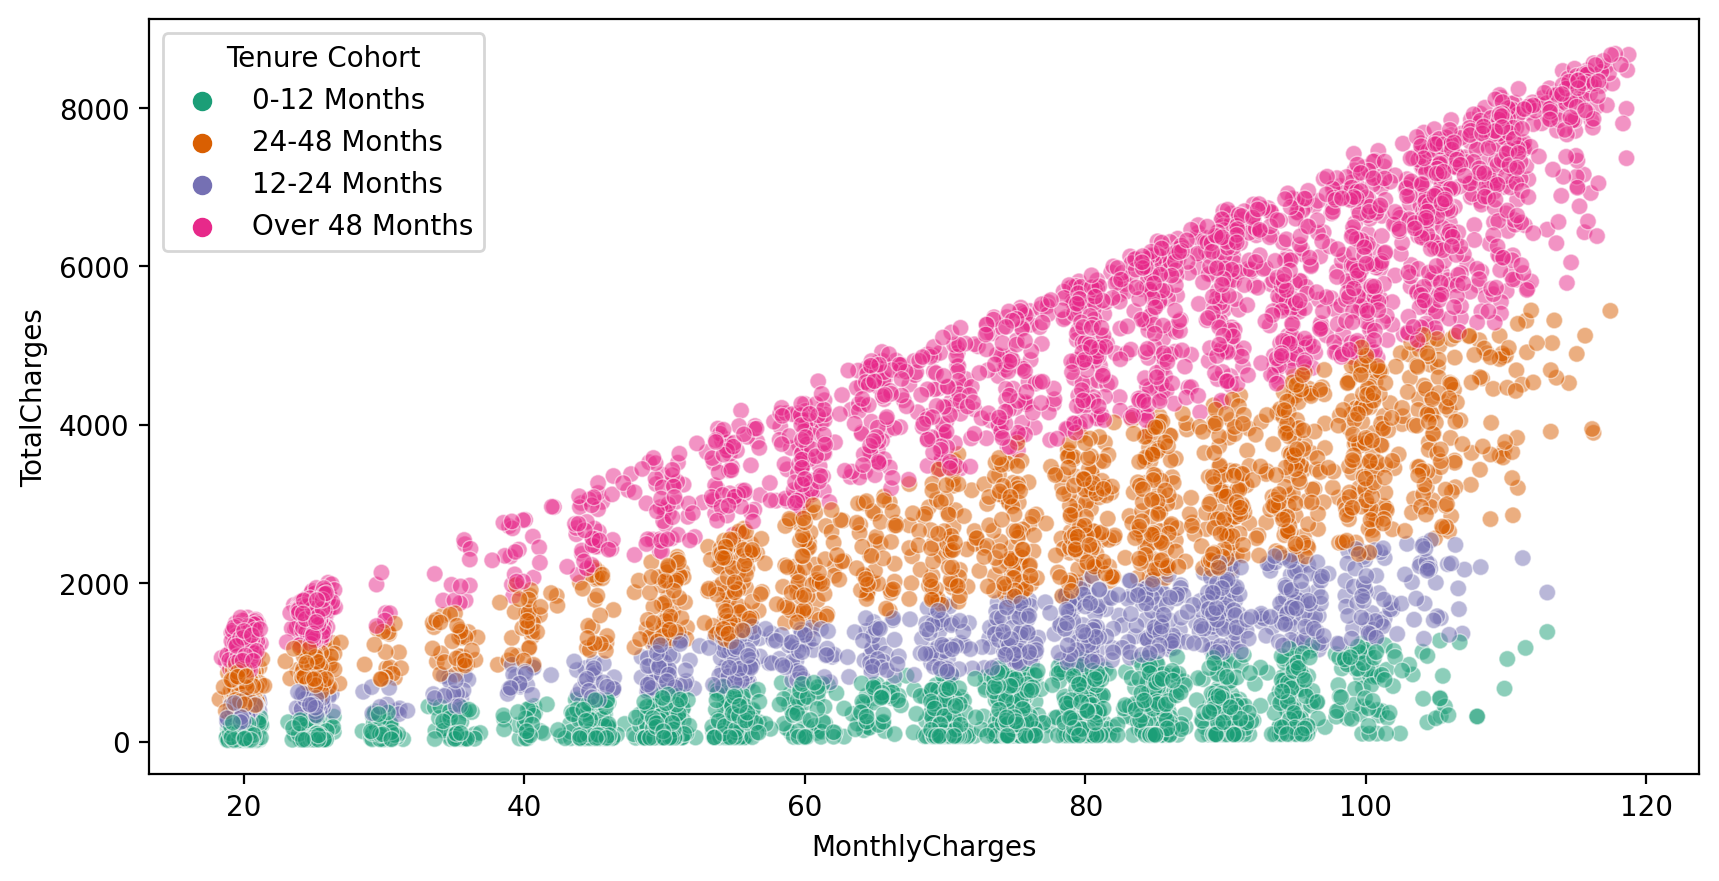

In [115]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', linewidth=0.5, alpha=0.5, palette='Dark2');


-------

## <a name='churn_count_cohort'>Churn Count per Cohort Group</a>

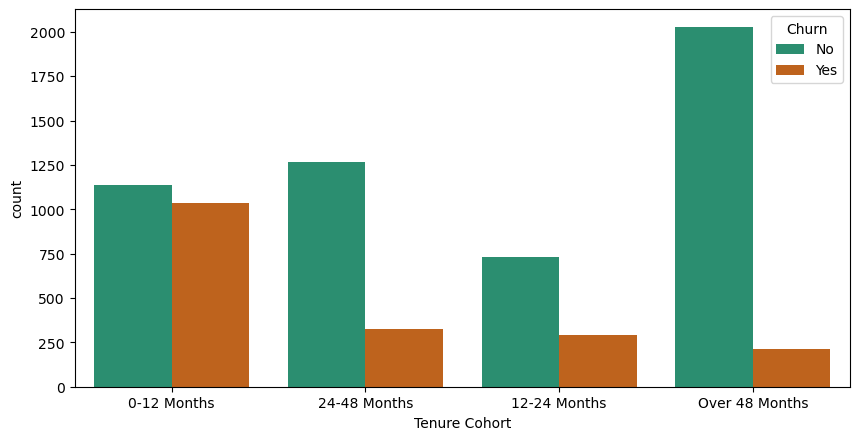

In [120]:
plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn', palette='Dark2');

+ We can clearly see that for `0-12 Months`, Churn and No Churn is almost identical.
+ For `12-24 Months`, Churn and No Churn is about 50% and 50%.
+ For longer Cohort group (`24-48 Months` and `Over 48 Months`, Churn drops significantly.
+ We might want to consider how to attract short term customers (like 0-12 Months) to become long term customers. In addition to that, we may want to pay attention to 12-24 Months group too.


----------

## <a name='vis_tenure_contract_churn'>Visualization of Tenure Cohort, separated out by contract type and Churn</a>

<Figure size 2000x800 with 0 Axes>

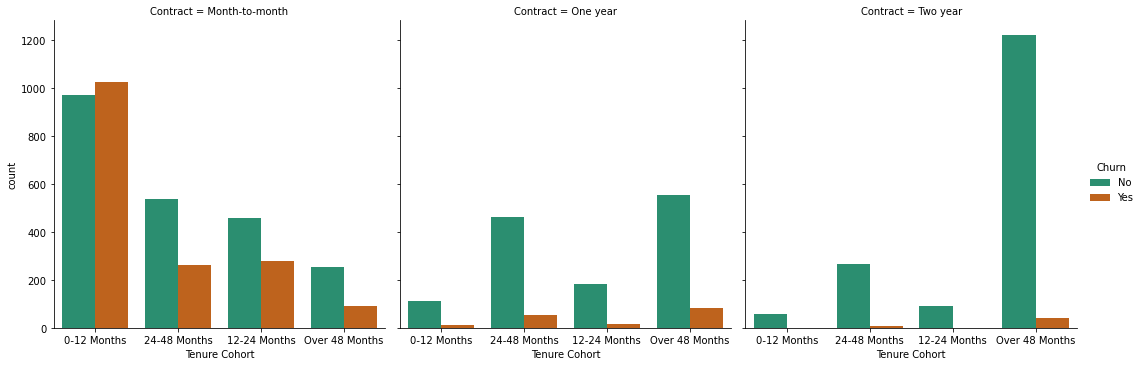

In [128]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df, x='Tenure Cohort', col='Contract', kind='count', hue='Churn', palette='Dark2');

# we need to specificy what kind of plot are we making, in this case we are making count plot.

Now we can finally see the seperation of data clearly.

+ Overall `Month-to-Month` customers very likely to churn compared to other contract type.
+ The longer customer stays with the service, the less likely they are churning.
+ However there are some churning happening for `24-48 Months` and `Over 48 Months` group in `Contract One and Two Year`. So we need to pay attention for those customers too.

--------

-----

# <a name='modelling'>Part 4: Predictive Modeling</a>

**We will explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**

## <a name='decisiontree'>Single Decision Tree</a>

## Features and Labels separation, Categorical Encoding

In [187]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [189]:
X = df.drop(['customerID', 'Churn'], axis=1)
X = pd.get_dummies(X, drop_first=True)

In [190]:
y = df['Churn']

## Train Test Split

In [385]:
from sklearn.model_selection import train_test_split

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [397]:
X_train.shape, X_test.shape, X_val.shape

((5625, 33), (703, 33), (704, 33))

## Modelling

In [418]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [419]:
# help(DecisionTreeClassifier)

In [420]:
paramaters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5,50,1),
    'max_features': ['auto', 'sqrt', 'log2'],   
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), paramaters, cv=5)

In [422]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), paramaters, cv=5).fit(X_train, y_train)

In [423]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [424]:
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2')

### Model Evaluation

In [404]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [425]:
dt_predictions = dt_grid.predict(X_test)

In [426]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87       535
         Yes       0.61      0.39      0.48       168

    accuracy                           0.80       703
   macro avg       0.72      0.66      0.68       703
weighted avg       0.78      0.80      0.78       703



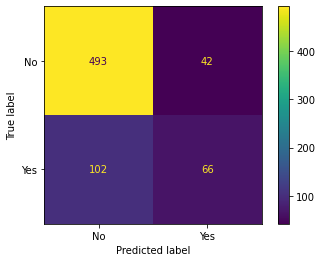

In [428]:
plot_confusion_matrix(dt_grid, X_test, y_test);

In [430]:
42 + 102

144

+ For FP (42 customers who are going to chun as per model predictions), we might to want to give them Promotion, discount etc to attract them to stay longer with the service.
+ Theare are total 144 misclassifications with FN (102 customers who are going to chun, model predicated as No Chun).

Overall our model has 80% accuracy. For Recall and F1 score, Churn Yes has much lower % than No Churn (as we already awared of data inbalanced).

### Feature importances

In [431]:
dt_grid.best_estimator_.feature_importances_

array([5.93592447e-03, 3.55332661e-01, 6.06806922e-02, 7.30585215e-02,
       9.08491482e-03, 6.12907380e-03, 4.19222438e-03, 5.11502100e-05,
       0.00000000e+00, 2.60923721e-03, 4.58990245e-02, 9.57478755e-02,
       0.00000000e+00, 6.64483586e-02, 0.00000000e+00, 2.11108998e-03,
       0.00000000e+00, 3.42297623e-03, 1.01063762e-01, 5.36074778e-03,
       0.00000000e+00, 1.06960574e-02, 0.00000000e+00, 2.39301960e-03,
       4.37977798e-02, 5.43393323e-02, 5.77554432e-03, 3.32774030e-03,
       6.68286044e-03, 6.35825366e-03, 1.15839713e-03, 3.90411207e-03,
       2.44386690e-02])

In [432]:
imp_features = pd.DataFrame(data=dt_grid.best_estimator_.feature_importances_, 
                                               index=X.columns,
                                               columns=['Feature Imporance'])

In [433]:
imp_features.sort_values('Feature Imporance', ascending=False)

,Feature Imporance
tenure,0.355333
TechSupport_No internet service,0.101064
InternetService_No,0.095748
TotalCharges,0.073059
OnlineSecurity_Yes,0.066448
MonthlyCharges,0.060681
Contract_Two year,0.054339
InternetService_Fiber optic,0.045899
Contract_One year,0.043798
Tenure Cohort_Over 48 Months,0.024439


As there are a lot of features with feature impotrances of 0, we will filter them out.

In [434]:
imp_features = imp_features[imp_features['Feature Imporance']  > 0].sort_values('Feature Imporance')

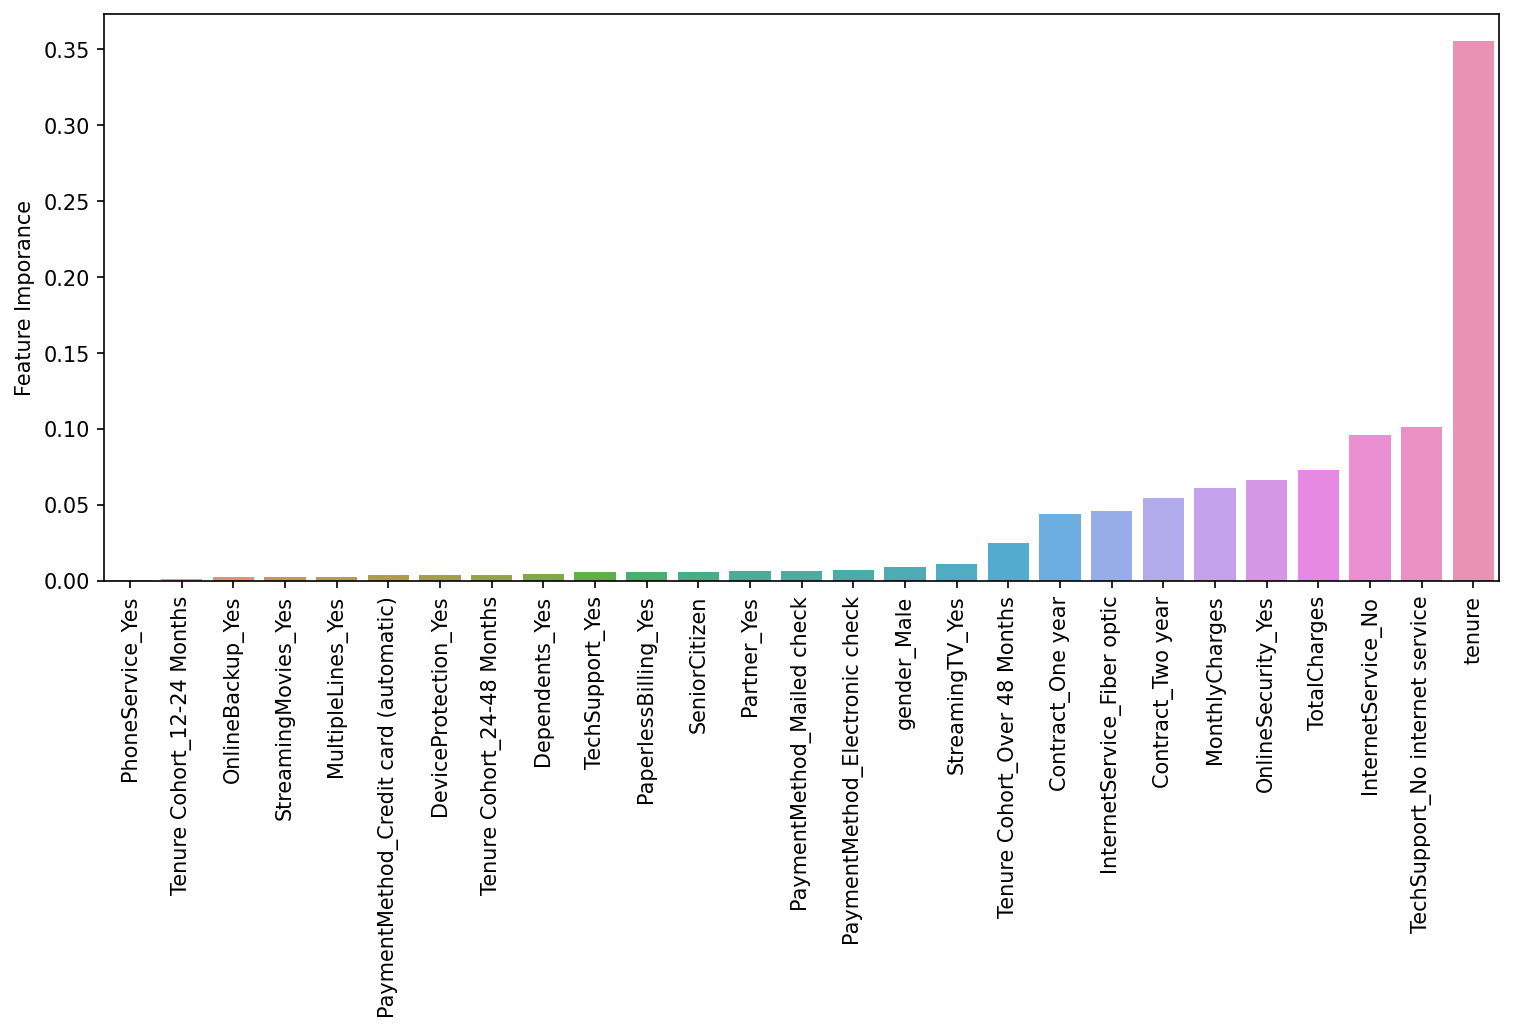

In [435]:
plt.figure(figsize=(12, 5), dpi=150)
sns.barplot(data=imp_features, x=imp_features.index, y='Feature Imporance');
plt.xticks(rotation=90);

In [436]:
from sklearn.tree import plot_tree

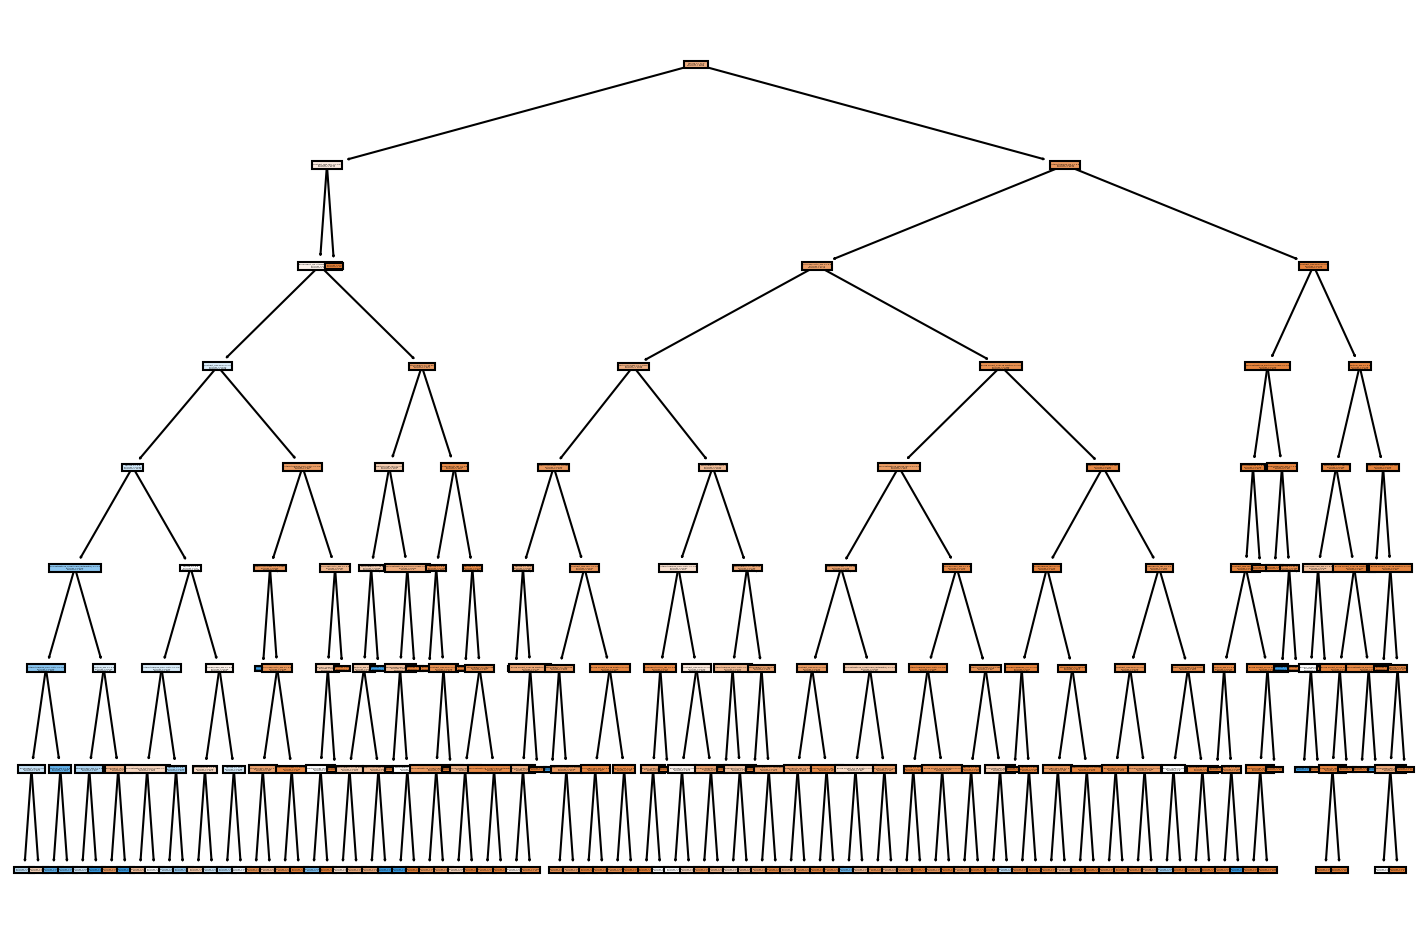

In [437]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt_grid.best_estimator_, filled=True, feature_names=X.columns);

----------

-------

## <a name='randomforest'>Random Forest</a>

In [438]:
from sklearn.ensemble import RandomForestClassifier

In [445]:
# help(RandomForestClassifier)

In [482]:
parameters = {
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200, 300],
    'max_features': ["auto", "sqrt", "log2"],
}

rf_grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5, verbose=2, n_jobs=-1)

In [483]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200,
                                          300]},
             verbose=2)

In [484]:
rf_grid.best_estimator_

RandomForestClassifier(max_features='log2', n_estimators=300)

In [485]:
rf_grid.best_params_

{'max_features': 'log2', 'n_estimators': 300}

In [486]:
rf_predictions = rf_grid.predict(X_test)

In [487]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

          No       0.84      0.89      0.87       535
         Yes       0.57      0.45      0.50       168

    accuracy                           0.79       703
   macro avg       0.71      0.67      0.69       703
weighted avg       0.77      0.79      0.78       703



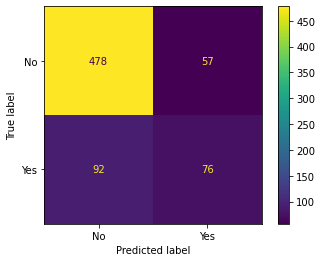

In [488]:
plot_confusion_matrix(rf_grid, X_test, y_test);

Although accuracy is not improving compared to Decision Tree,
+ Recall, F1-Score in overall get a little more balanced.
+ FN gets lower from 486 to 424.

-------

## <a name='boosted'>Boosted Trees with Ada Boost and Gradient Boost</a>

In [499]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Ada Boost

In [451]:
ada_model = AdaBoostClassifier()

In [452]:
gb_model = GradientBoostingClassifier()

In [457]:
parameters = {
    'n_estimators': np.arange(50, 300, 20),
}

ada_grid = GridSearchCV(ada_model, parameters, cv=5)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': array([ 50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290])})

In [460]:
ada_predictions = ada_grid.predict(X_test)

print(classification_report(y_test, ada_predictions))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88       535
         Yes       0.62      0.52      0.56       168

    accuracy                           0.81       703
   macro avg       0.74      0.71      0.72       703
weighted avg       0.80      0.81      0.80       703



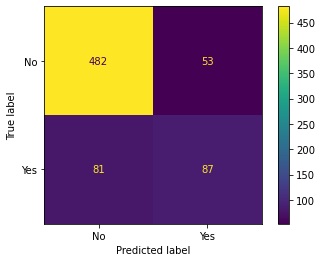

In [461]:
plot_confusion_matrix(ada_grid, X_test, y_test);

----

# Gradient Boost

In [462]:
gb_grid = GridSearchCV(gb_model, parameters, cv=5)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': array([ 50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290])})

In [463]:
gb_predictions = gb_grid.predict(X_test)

print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       535
         Yes       0.63      0.49      0.55       168

    accuracy                           0.81       703
   macro avg       0.74      0.70      0.71       703
weighted avg       0.80      0.81      0.80       703



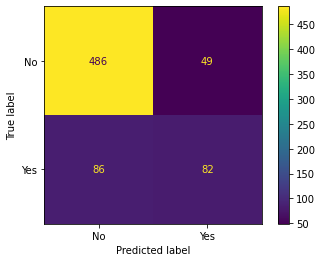

In [465]:
plot_confusion_matrix(gb_grid, X_test, y_test);

--------

# <a name='final_model'>Final Model Selection and Evaluation</a>

Overall models performance are not really that different. However as we want to focus on more on reducing False Negative (Customer Acutally Churning, but model predicts No Churn), we will choose `Ada Boost` which performs the best in that area.

In [496]:
# testing in validiation set
ada_predictions_val = ada_grid.predict(X_val)

In [497]:
print(classification_report(y_val, ada_predictions_val))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       517
         Yes       0.65      0.58      0.61       187

    accuracy                           0.81       704
   macro avg       0.75      0.73      0.74       704
weighted avg       0.80      0.81      0.80       704



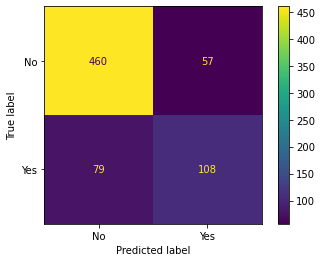

In [498]:
plot_confusion_matrix(ada_grid, X_val, y_val);